## A.I. Assignment 5

## Learning Goals

By the end of this lab, you should be able to:
* Get more familiar with tensors in pytorch 
* Create a simple multilayer perceptron model with pytorch
* Visualise the parameters


### Task

Build a fully connected feed forward network that adds two bits. Determine the a propper achitecture for this network (what database you use for this problem? how many layers? how many neurons on each layer? what is the activation function? what is the loss function? etc)

Create at least 3 such networks and compare their performance (how accurate they are?, how farst they are trained to get at 1 accuracy?)

Display for the best one the weights for each layer.


In [48]:
import torch
import torch.nn as nn
from collections import OrderedDict

data_in = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
print(data_in)

data_target = torch.tensor([[0, 0], [0, 1], [0, 1], [1, 0]], dtype=torch.float)
print(data_target)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
tensor([[0., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.]])


In [113]:
import matplotlib.pyplot as plt

def plot_loss(loss_values):
    plt.plot(loss_values)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.show()

In [93]:
# your code here
model1 = nn.Sequential(OrderedDict([
    ('hidden', nn.Linear(2, 3)),
    ('ReLU', nn.ReLU()),
    ('output', nn.Linear(3, 2)),
    ('sigmoid', nn.Sigmoid())
]))

In [94]:
print(model1)

Sequential(
  (hidden): Linear(in_features=2, out_features=3, bias=True)
  (ReLU): ReLU()
  (output): Linear(in_features=3, out_features=2, bias=True)
  (sigmoid): Sigmoid()
)


In [109]:
criterion1 = nn.MSELoss() # 1/n * sum of squares of differences (target, result)
optimizer1 = torch.optim.SGD(model1.parameters(), lr=0.1)

In [96]:
losses1 = []

for epoch in range(10000):
    # reset gradient to avoid accumulating from previous computations
    optimizer1.zero_grad()
    # go forward
    outputs1 = model1(data_in)
    # compute loss
    loss1 = criterion1(outputs1, data_target)
    #backward
    loss1.backward()
    # update weights
    optimizer1.step()
    losses1.append(loss1.item())

    predicted_classes1 = (outputs1.round() == data_target)
    accuracy1 = predicted_classes1.sum().item() / len(data_target)

    if (epoch + 1) % 100 == 0:
        print(f"Epoch: {epoch + 1}, loss: {loss1.item()}")
    
    if accuracy1 == 1:
        print(f"Model 1 reached 100% accuracy at epoch {epoch+1}")
        break

print("done")

Model 1 reached 100% accuracy at epoch 29
done


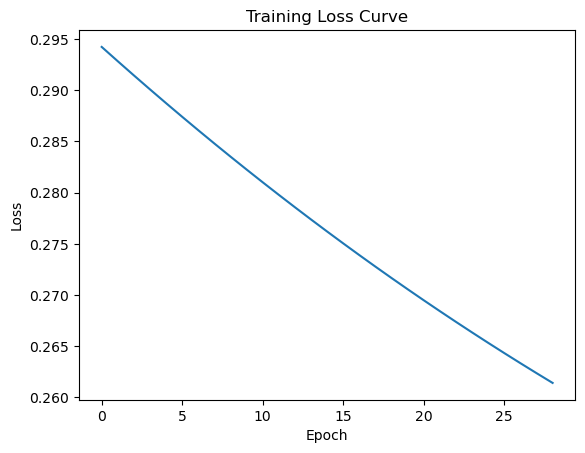

In [116]:
plot_loss(losses1)

In [61]:
# your code here
# visualize the resuts
predicted = torch.round(outputs1)
correct = (predicted == data_target).sum()
total = data_target.size(0)
accuracy = correct / total
print(f'Model Accuracy: {accuracy}%') 

Model Accuracy: 1.0%


In [62]:
# your code here
# print model wights
print(f"Model weights:")
for name, param in model1.named_parameters():
    if param.requires_grad:
        print(name, param.data)

Model weights:
hidden.weight tensor([[-0.1583,  0.0103],
        [-0.0419,  0.1704],
        [ 0.2014, -0.6422]])
hidden.bias tensor([-0.2609,  0.6006,  0.2797])
output.weight tensor([[-0.0287, -0.3561, -0.3580],
        [-0.5172, -0.1896,  0.1956]])
output.bias tensor([0.3548, 0.2643])


In [105]:
model2 = nn.Sequential(OrderedDict([
    ('hidden', nn.Linear(2, 4)),
    ('ReLU', nn.ReLU()),
    ('output', nn.Linear(4, 2)),
    ('sigmoid', nn.Sigmoid())
]))

In [106]:
print(model2)

Sequential(
  (hidden): Linear(in_features=2, out_features=4, bias=True)
  (ReLU): ReLU()
  (output): Linear(in_features=4, out_features=2, bias=True)
  (sigmoid): Sigmoid()
)


In [107]:
criterion2 = nn.MSELoss()
optimizer2 = torch.optim.SGD(model2.parameters(), lr=0.1)

In [108]:
losses2 = []

for epoch in range(10000):
    optimizer2.zero_grad()
    outputs2 = model2(data_in)
    loss2 = criterion2(outputs2, data_target)
    loss2.backward()
    optimizer2.step()
    losses2.append(loss2.item())

    predicted_classes2 = (outputs2.round() == data_target)
    accuracy2 = predicted_classes2.sum().item() / len(data_target)

    if (epoch + 1) % 100 == 0:
        print(f"Epoch: {epoch + 1}, loss: {loss2.item()}")
    
    if accuracy2 == 1:
        print(f"Model 2 reached 100% accuracy at epoch {epoch+1}")
        break

print("done")

Model 2 reached 100% accuracy at epoch 37
done


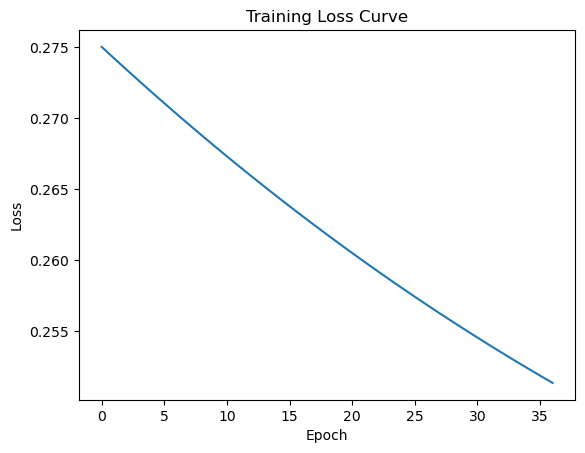

In [118]:
plot_loss(losses2)

In [67]:
# visualize the resuts
predicted = torch.round(outputs2)
correct = (predicted == data_target).sum()
total = data_target.size(0)
accuracy = correct / total
print(f'Model Accuracy: {accuracy}%') 

Model Accuracy: 1.0%


In [68]:
# print model wights
print(f"Model weights:")
for name, param in model2.named_parameters():
    if param.requires_grad:
        print(name, param.data)

Model weights:
hidden.weight tensor([[-0.6250, -0.4252],
        [-0.1131,  0.6658],
        [ 0.1023, -0.1831],
        [ 0.3100, -0.2693]])
hidden.bias tensor([-0.4577,  0.4456, -0.3215, -0.1243])
output.weight tensor([[-0.4974,  0.1567,  0.3788,  0.1587],
        [-0.3486, -0.4893, -0.4061,  0.3910]])
output.bias tensor([-0.0840,  0.4037])


In [149]:
model3 = nn.Sequential(OrderedDict([
    ('hidden', nn.Linear(2, 3)),
    ('tanh_hidden', nn.Tanh()),
    ('output', nn.Linear(3, 2)),
    ('tanh_output', nn.Tanh())
]))

In [150]:
print(model3)

Sequential(
  (hidden): Linear(in_features=2, out_features=3, bias=True)
  (tanh_hidden): Tanh()
  (output): Linear(in_features=3, out_features=2, bias=True)
  (tanh_output): Tanh()
)


In [151]:
criterion3 = nn.MSELoss() # 1/n * sum of squares of differences (target, result)
optimizer3 = torch.optim.SGD(model3.parameters(), lr=0.1)

In [152]:
losses3 = []

for epoch in range(10000):
    # reset gradient to avoid accumulating from previous computations
    optimizer3.zero_grad()
    # go forward
    outputs3 = model3(data_in)
    # compute loss
    loss3 = criterion3(outputs3, data_target)
    #backward
    loss3.backward()
    # update weights
    optimizer3.step()

    losses3.append(loss3.item())
    predicted_classes3 = (outputs3.round() == data_target)
    accuracy3 = predicted_classes3.sum().item() / len(data_target)
    if accuracy3 == 1:
        print(f"Model 3 reached 100% accuracy at epoch {epoch+1}")
        break

print("done")

Model 3 reached 100% accuracy at epoch 8
done


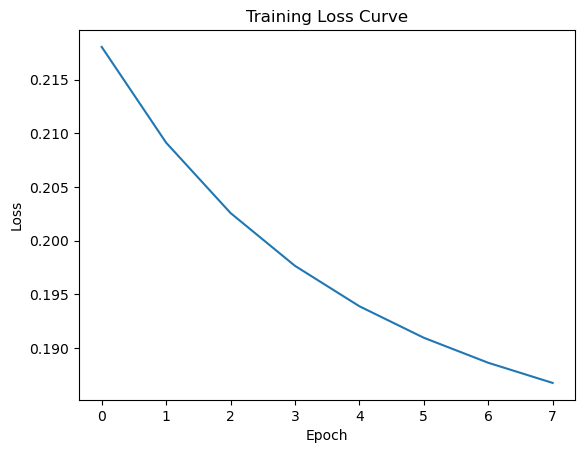

In [153]:
plot_loss(losses3)

In [154]:
# visualize the resuts
predicted = torch.round(outputs3)
correct = (predicted == data_target).sum()
total = data_target.size(0)
accuracy = correct / total
print(f'Model Accuracy: {accuracy}%') 

Model Accuracy: 1.0%


In [155]:
# print model wights
print(f"Model weights:")
for name, param in model3.named_parameters():
    if param.requires_grad:
        print(name, param.data)

Model weights:
hidden.weight tensor([[-0.1330,  0.6411],
        [ 0.6854,  0.1992],
        [ 0.2231,  0.1355]])
hidden.bias tensor([-0.0155, -0.0903, -0.0160])
output.weight tensor([[ 0.2354,  0.5569, -0.1389],
        [-0.2048, -0.0866, -0.2506]])
output.bias tensor([0.0693, 0.5504])


In [ ]:
# model 4

In [164]:
model4 = nn.Sequential(OrderedDict([
    ('hidden', nn.Linear(2, 3)),
    ('sigmoid_hidden', nn.Sigmoid()),
    ('output', nn.Linear(3, 2)),
    ('sigmoid_out', nn.Sigmoid())
]))

In [165]:
print(model4)

Sequential(
  (hidden): Linear(in_features=2, out_features=3, bias=True)
  (sigmoid_hidden): Sigmoid()
  (output): Linear(in_features=3, out_features=2, bias=True)
  (sigmoid_out): Sigmoid()
)


In [166]:
criterion4 = nn.MSELoss()
optimizer4 = torch.optim.SGD(model4.parameters(), lr=0.1)

In [167]:
losses4 = []

for epoch in range(10000):
    # reset gradient to avoid accumulating from previous computations
    optimizer4.zero_grad()
    # go forward
    outputs4 = model4(data_in)
    # compute loss
    loss4 = criterion4(outputs4, data_target)
    #backward
    loss4.backward()
    # update weights
    optimizer4.step()

    losses4.append(loss4.item())
    
    predicted_classes4 = (outputs4.round() == data_target)
    accuracy4 = predicted_classes4.sum().item() / len(data_target)
    if accuracy4 == 1:
        print(f"Model 4 reached 100% accuracy at epoch {epoch+1}")
        break

print("done")

Model 4 reached 100% accuracy at epoch 40
done


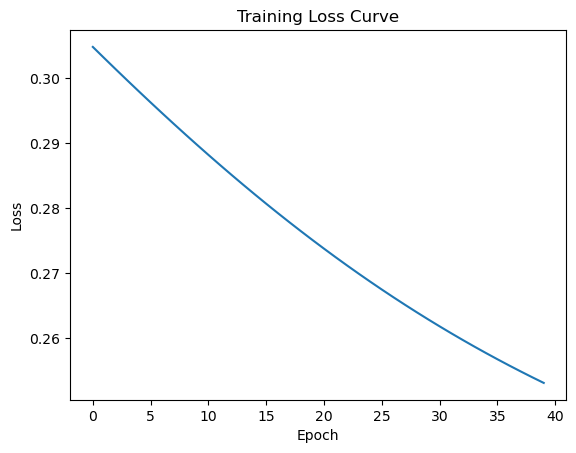

In [168]:
plot_loss(losses4)

In [169]:
# visualize the resuts
predicted = torch.round(outputs4)
correct = (predicted == data_target).sum()
total = data_target.size(0)
accuracy = correct / total
print(f'Model Accuracy: {accuracy}%') 

Model Accuracy: 1.0%


In [170]:
# print model wights
print(f"Model weights:")
for name, param in model4.named_parameters():
    if param.requires_grad:
        print(name, param.data)

Model weights:
hidden.weight tensor([[-0.4868,  0.5742],
        [-0.4315, -0.0537],
        [-0.1552,  0.1274]])
hidden.bias tensor([0.6411, 0.0390, 0.4304])
output.weight tensor([[ 0.2415,  0.3078, -0.3902],
        [-0.1079,  0.2942, -0.1363]])
output.bias tensor([-0.0466, -0.0905])


In [172]:
# displaying best model (model 3)
best_model = model3
best_model.eval()

Sequential(
  (hidden): Linear(in_features=2, out_features=3, bias=True)
  (tanh_hidden): Tanh()
  (output): Linear(in_features=3, out_features=2, bias=True)
  (tanh_output): Tanh()
)

In [173]:
# Access the weights for each layer
for name, param in best_model.named_parameters():
    if param.requires_grad:
        print(f'Layer: {name}, Size: {param.size()}')
        print(param)

Layer: hidden.weight, Size: torch.Size([3, 2])
Parameter containing:
tensor([[-0.1330,  0.6411],
        [ 0.6854,  0.1992],
        [ 0.2231,  0.1355]], requires_grad=True)
Layer: hidden.bias, Size: torch.Size([3])
Parameter containing:
tensor([-0.0155, -0.0903, -0.0160], requires_grad=True)
Layer: output.weight, Size: torch.Size([2, 3])
Parameter containing:
tensor([[ 0.2354,  0.5569, -0.1389],
        [-0.2048, -0.0866, -0.2506]], requires_grad=True)
Layer: output.bias, Size: torch.Size([2])
Parameter containing:
tensor([0.0693, 0.5504], requires_grad=True)
